In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn .linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns
data = pd.read_excel('data/PHW6/new_bmi_dataset.xlsx')
print("# Print dataset statistical data, feature names & data types")
print(data.describe())
print(data.dtypes)

# Print dataset statistical data, feature names & data types
              Age  Height (Inches)  Weight (Pounds)         BMI
count  100.000000       100.000000       100.000000  100.000000
mean    27.710000        67.753037       124.101520    2.420000
std      5.347132         2.061955        16.745017    1.036505
min     18.000000        63.125500        83.085300    0.000000
25%     23.750000        66.535825       116.573575    2.000000
50%     28.000000        67.805600       124.675200    3.000000
75%     32.250000        69.064800       134.534375    3.000000
max     35.000000        73.268700       164.586500    4.000000
Sex                 object
Age                  int64
Height (Inches)    float64
Weight (Pounds)    float64
BMI                  int64
dtype: object


# Plot height & weight histograms (bins=10) for each BMI value


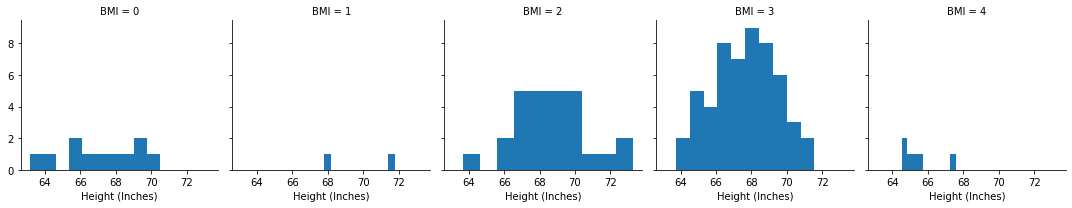

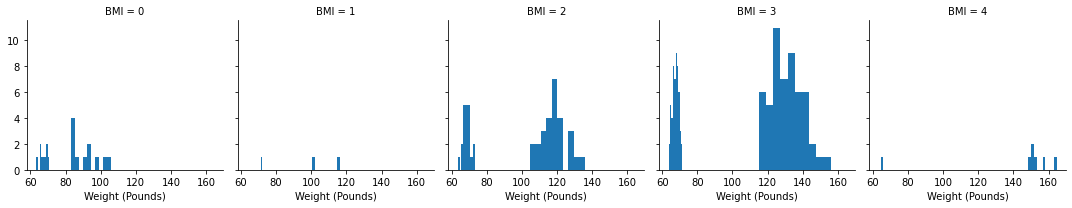

In [16]:
print("# Plot height & weight histograms (bins=10) for each BMI value")

graph = sns.FacetGrid(data, col='BMI', col_order=[0,1,2,3,4])
graph.map(plt.hist, 'Height (Inches)', bins=10)
plt.show()
graph.map(plt.hist, 'Weight (Pounds)', bins=10)
plt.show()

# Plot scaling results for height and weight


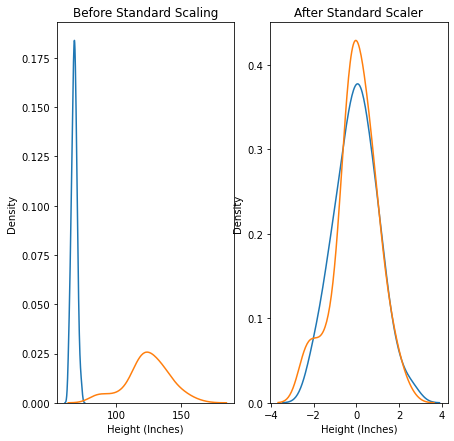

In [22]:
print("# Plot scaling results for height and weight")
print("# Standard scaler")

height_weight_only = data.loc[:, ['Height (Inches)', 'Weight (Pounds)']]
Standard_scaler = preprocessing.StandardScaler()
scaled_df = Standard_scaler.fit_transform(height_weight_only)
scaled_height_weight_only = pd.DataFrame(scaled_df, columns=['Height (Inches)', 'Weight (Pounds)'])


fig, scale_graph = plt.subplots(ncols=2, figsize=(7, 7))

scale_graph[0].set_title('Before Standard Scaling')
sns.kdeplot(data['Height (Inches)'], ax=scale_graph[0])
sns.kdeplot(data['Weight (Pounds)'], ax=scale_graph[0])

scale_graph[1].set_title('After Standard Scaler')
sns.kdeplot(scaled_height_weight_only['Height (Inches)'], ax=scale_graph[1])
sns.kdeplot(scaled_height_weight_only['Weight (Pounds)'], ax=scale_graph[1])
plt.show()

# Plot scaling results for height and weight
# MinMax scaler


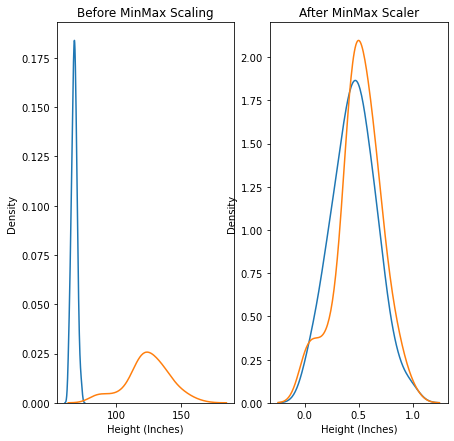

In [23]:
print("# Plot scaling results for height and weight")
print("# MinMax scaler")

MinMax_scaler = preprocessing.MinMaxScaler()
scaled_df = MinMax_scaler.fit_transform(height_weight_only)
scaled_height_weight_only = pd.DataFrame(scaled_df, columns=['Height (Inches)', 'Weight (Pounds)'])

fig, scale_graph = plt.subplots(ncols=2, figsize=(7, 7))

scale_graph[0].set_title('Before MinMax Scaling')
sns.kdeplot(data['Height (Inches)'], ax=scale_graph[0])
sns.kdeplot(data['Weight (Pounds)'], ax=scale_graph[0])

scale_graph[1].set_title('After MinMax Scaler')
sns.kdeplot(scaled_height_weight_only['Height (Inches)'], ax=scale_graph[1])
sns.kdeplot(scaled_height_weight_only['Weight (Pounds)'], ax=scale_graph[1])
plt.show()

# Plot scaling results for height and weight
# Robust scaler


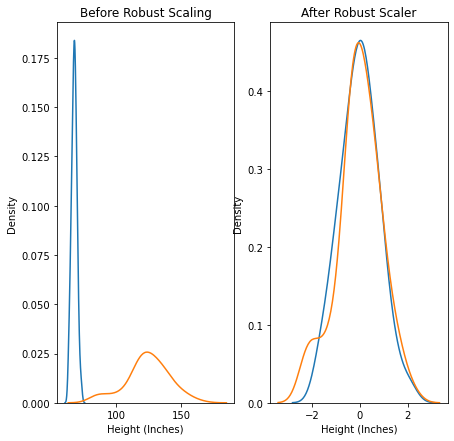

In [24]:
print("# Plot scaling results for height and weight")
print("# Robust scaler")

Robust_scaler = preprocessing.RobustScaler()
scaled_df = Robust_scaler.fit_transform(height_weight_only)
scaled_height_weight_only = pd.DataFrame(scaled_df, columns=['Height (Inches)', 'Weight (Pounds)'])


fig, scale_graph = plt.subplots(ncols=2, figsize=(7, 7))

scale_graph[0].set_title('Before Robust Scaling')
sns.kdeplot(data['Height (Inches)'], ax=scale_graph[0])
sns.kdeplot(data['Weight (Pounds)'], ax=scale_graph[0])

scale_graph[1].set_title('After Robust Scaler')
sns.kdeplot(scaled_height_weight_only['Height (Inches)'], ax=scale_graph[1])
sns.kdeplot(scaled_height_weight_only['Weight (Pounds)'], ax=scale_graph[1])
plt.show()

# find outlier people


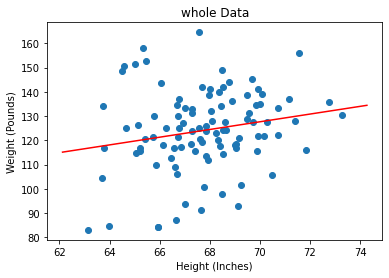

In [28]:
print("# find outlier people")

height = data.loc[:, 'Height (Inches)']
weight = data.loc[:, 'Weight (Pounds)']

linear_reg = LinearRegression()
linear_reg.fit(height.values.reshape(-1,1), weight)

px = np.array([height.min() - 1, height.max() + 1])
py = linear_reg.predict(px[:, np.newaxis])

plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')
plt.title('whole Data')

plt.scatter(height, weight)
plt.plot(px, py, color='red')
plt.show()

In [52]:
list = np.arange(0, len(data))
new_dataFrame = pd.DataFrame(list, columns=['w_prime'])

nnew_dataFrame = data.copy()
nnew_dataFrame['w_prime'] = np.NaN
e = []
for i in range(len(data)) :
    new_dataFrame.loc[i, ['w_prime']] = linear_reg.predict(height[i].reshape(-1, 1))

w_prime = new_dataFrame['w_prime']
for i in range(len(data)) :
    tmp = weight[i] - w_prime[i]
    e.append(tmp)

new_dataFrame['e_values'] = e
new_dataFrame

,w_prime,e_values
0,117.802648,-1.059548
1,122.573489,2.581911
2,129.486797,7.624603
3,122.337450,-35.355450
4,126.832515,11.911885
...,...,...
95,122.449986,7.647514
96,123.977163,-4.451063
97,121.218134,-36.858334
98,125.491625,-1.085425


In [43]:
nnew_dataFrame

,Sex,Age,Height (Inches),Weight (Pounds),BMI,w_prime
0,Female,30,63.7902,116.7431,3,NaN
1,Female,32,66.7917,125.1554,3,NaN
2,Female,27,71.1411,137.1114,3,NaN
3,Male,24,66.6432,86.9820,0,NaN
4,Female,19,69.4712,138.7444,3,NaN
...,...,...,...,...,...,...
95,Female,23,66.7140,130.0975,3,NaN
96,Female,30,67.6748,119.5261,2,NaN
97,Male,29,65.9390,84.3598,0,NaN
98,Female,34,68.6276,124.4062,3,NaN


In [30]:
data

,Sex,Age,Height (Inches),Weight (Pounds),BMI
0,Female,30,63.7902,116.7431,3
1,Female,32,66.7917,125.1554,3
2,Female,27,71.1411,137.1114,3
3,Male,24,66.6432,86.9820,0
4,Female,19,69.4712,138.7444,3
...,...,...,...,...,...
95,Female,23,66.7140,130.0975,3
96,Female,30,67.6748,119.5261,2
97,Male,29,65.9390,84.3598,0
98,Female,34,68.6276,124.4062,3
